<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/deep-learning/computer-vision/villain_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers as tfl
import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from PIL import Image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

In [2]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
#!kaggle datasets list

In [4]:
!kaggle datasets download -d ujjwalchowdhury/yoga-pose-classification

 60% 9.00M/15.0M [00:01<00:00, 8.51MB/s]
100% 15.0M/15.0M [00:01<00:00, 14.7MB/s]


In [5]:
!unzip yoga-pose-classification.zip

Archive:  yoga-pose-classification.zip
  inflating: YogaPoses/Downdog/00000000.jpg  
  inflating: YogaPoses/Downdog/00000001.jpg  
  inflating: YogaPoses/Downdog/00000002.jpg  
  inflating: YogaPoses/Downdog/00000003.jpg  
  inflating: YogaPoses/Downdog/00000004.jpg  
  inflating: YogaPoses/Downdog/00000007.jpg  
  inflating: YogaPoses/Downdog/00000008.jpg  
  inflating: YogaPoses/Downdog/00000009.jpg  
  inflating: YogaPoses/Downdog/00000010.jpg  
  inflating: YogaPoses/Downdog/00000011.jpg  
  inflating: YogaPoses/Downdog/00000012.jpg  
  inflating: YogaPoses/Downdog/00000014.jpg  
  inflating: YogaPoses/Downdog/00000016.jpg  
  inflating: YogaPoses/Downdog/00000017.jpg  
  inflating: YogaPoses/Downdog/00000018.jpg  
  inflating: YogaPoses/Downdog/00000019.jpg  
  inflating: YogaPoses/Downdog/00000020.jpg  
  inflating: YogaPoses/Downdog/00000022.jpg  
  inflating: YogaPoses/Downdog/00000023.jpg  
  inflating: YogaPoses/Downdog/00000024.jpg  
  inflating: YogaPoses/Downdog/00000025.j

In [6]:
!pip install split-folders
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
input_folder = "../content/YogaPoses/"
output_folder = "../content/output_folder" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .1, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 988 files [00:00, 6186.03 files/s]


In [8]:
X_train, X_test, X_val, y_train, y_test, y_val = ([] for i in range(6))

In [9]:
def read_images(image_path, X_var_list, y_var_list):
  X_var_list.clear()
  y_var_list.clear()
  for folder in os.listdir(image_path):
      for img_file in os.listdir(image_path+'/'+folder+'/'):
        X_var_list.append(image_path+'/'+folder+'/'+img_file)
        y_var_list.append(folder)
  return X_var_list, y_var_list

In [10]:
X_train, y_train = read_images("../content/output_folder/train", X_train, y_train)
X_test, y_test = read_images("../content/output_folder/test", X_test, y_test)
X_val, y_val = read_images("../content/output_folder/val", X_val, y_val)

In [11]:
print(X_train[0])
print(len(X_test))
print(X_val)
print(y_val)

../content/output_folder/train/Downdog/00000197.jpg
105
['../content/output_folder/val/Downdog/00000089.jpg', '../content/output_folder/val/Downdog/00000346.jpg', '../content/output_folder/val/Downdog/00000347.jpg', '../content/output_folder/val/Downdog/00000414.jpg', '../content/output_folder/val/Downdog/00000176.jpg', '../content/output_folder/val/Downdog/00000409.jpg', '../content/output_folder/val/Downdog/00000055.jpg', '../content/output_folder/val/Downdog/00000075.jpg', '../content/output_folder/val/Downdog/00000201.jpg', '../content/output_folder/val/Downdog/00000310.jpg', '../content/output_folder/val/Downdog/00000422.jpg', '../content/output_folder/val/Downdog/00000053.jpg', '../content/output_folder/val/Downdog/00000001.jpg', '../content/output_folder/val/Downdog/00000404.jpg', '../content/output_folder/val/Downdog/00000142.jpg', '../content/output_folder/val/Downdog/00000143.jpg', '../content/output_folder/val/Downdog/00000392.jpg', '../content/output_folder/val/Downdog/0000

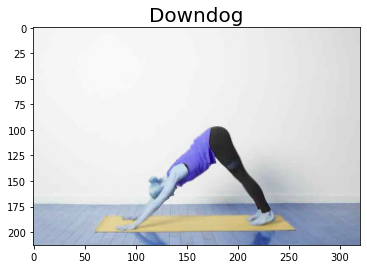

In [12]:
# checking train path
x=50
image = cv2.imread(X_train[x]) 

# the first image bleongs to clean directory under train
plt.imshow(image)
plt.title(y_train[x], fontsize = 20)
#plt.axis('on')
plt.show()

In [13]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
directory = "../content/YogaPoses/"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

Found 988 files belonging to 5 classes.
Using 791 files for training.
Found 988 files belonging to 5 classes.
Using 197 files for validation.


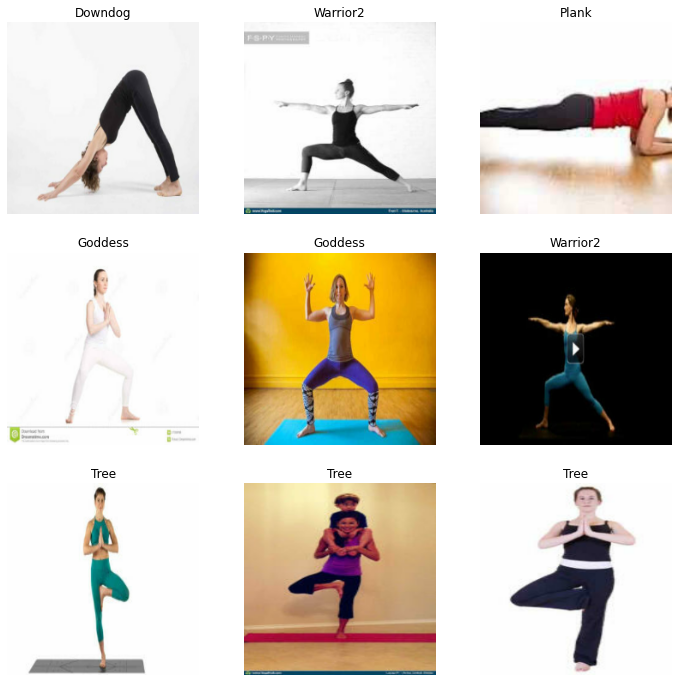

In [14]:
class_names = train_dataset.class_names

plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [16]:
def data_augmenter():
    '''
    Create a Sequential model composed of 2 layers
    Returns:
        tf.keras.Sequential
    '''
    ### START CODE HERE
    data_augmentation = tf.keras.Sequential([])
    data_augmentation.add(RandomFlip('horizontal'))
    data_augmentation.add(RandomRotation(0.2))
    ### END CODE HERE
    
    return data_augmentation

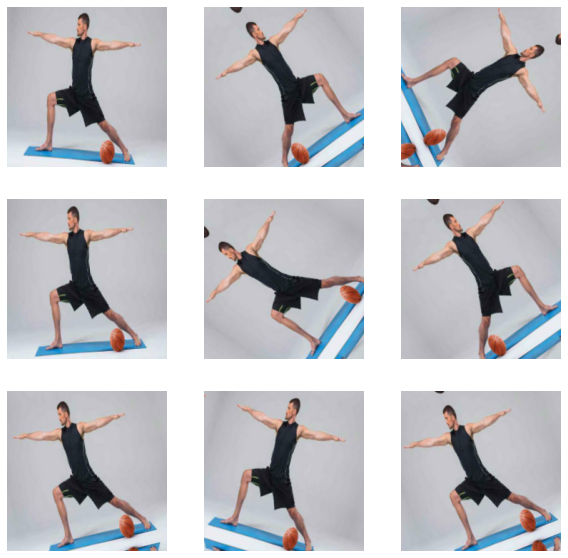

In [17]:
data_augmentation = data_augmenter()

for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [18]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [19]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=True,
                                               weights='imagenet')

14548992/14536120 [==============================] - 0s 0us/step


In [20]:
def alpaca_model(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):
    ''' Define a tf.keras model for binary classification out of the MobileNetV2 model
    Arguments:
        image_shape -- Image width and height
        data_augmentation -- data augmentation function
    Returns:
    Returns:
        tf.keras.model
    '''
    
    
    input_shape = image_shape + (3,)
    
    ### START CODE HERE
    
    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False, # <== Important!!!!
                                                   weights='imagenet') # From imageNet
    
    # freeze the base model by making it non trainable
    base_model.trainable = False 

    # create the input layer (Same as the imageNetv2 input size)
    inputs = tf.keras.Input(shape=input_shape) 
    
    # apply data augmentation to the inputs
    x = data_augmentation(inputs)
    
    # data preprocessing using the same weights the model was trained on
    x = preprocess_input(x) 
    
    # set training to False to avoid keeping track of statistics in the batch norm layer
    x = base_model(x, training=False) 
    
    # add the new Binary classification layers
    # use global avg pooling to summarize the info in each channel
    x = tfl.GlobalAveragePooling2D()(x) 
    # include dropout with probability of 0.2 to avoid overfitting
    x = tfl.Dropout(0.2)(x)
        
    # use a prediction layer with one neuron (as a binary classifier only needs one)
    outputs = tfl.Dense(units=1)(x)
    
    ### END CODE HERE
    
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [21]:
model2 = alpaca_model(IMG_SIZE, data_augmentation)

9420800/9406464 [==============================] - 0s 0us/step


In [22]:
base_learning_rate = 0.001
model2.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
initial_epochs = 5
history = model2.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)

Epoch 1/5
25/25 [==============================] - 36s 1s/step - loss: -8.8027 - accuracy: 0.2048 - val_loss: -12.8770 - val_accuracy: 0.1878
Epoch 2/5
25/25 [==============================] - 31s 1s/step - loss: -21.3798 - accuracy: 0.2048 - val_loss: -24.2803 - val_accuracy: 0.1878
Epoch 3/5
25/25 [==============================] - 31s 1s/step - loss: -33.6149 - accuracy: 0.2048 - val_loss: -35.3504 - val_accuracy: 0.1878
Epoch 4/5
25/25 [==============================] - 33s 1s/step - loss: -46.4576 - accuracy: 0.2048 - val_loss: -46.4977 - val_accuracy: 0.1878
Epoch 5/5
25/25 [==============================] - 31s 1s/step - loss: -59.7241 - accuracy: 0.2048 - val_loss: -57.9114 - val_accuracy: 0.1878


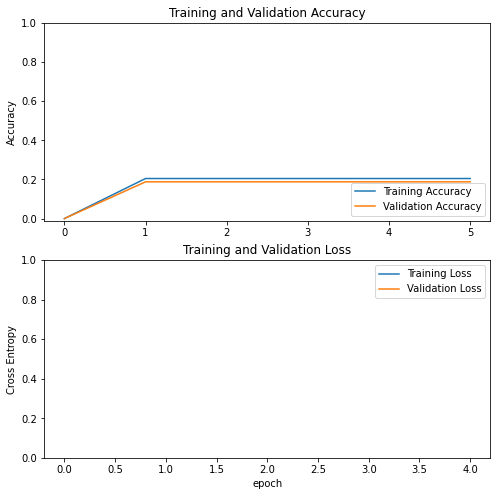

In [25]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [26]:
class_names

['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']

In [32]:
# UNQ_C3
base_model = model2.layers[4]
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 120

### START CODE HERE

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = True
    
# Define a BinaryCrossentropy loss function. Use from_logits=True
loss_function=tf.keras.losses.BinaryCrossentropy(from_logits=True)
# Define an Adam optimizer with a learning rate of 0.1 * base_learning_rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01*base_learning_rate)
# Use accuracy as evaluation metric
metrics=['accuracy']

### END CODE HERE

model2.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)

Number of layers in the base model:  154


In [33]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model2.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 5/10
25/25 [==============================] - 137s 5s/step - loss: -972.6172 - accuracy: 0.2048 - val_loss: -919.2409 - val_accuracy: 0.1878
Epoch 6/10
25/25 [==============================] - 115s 5s/step - loss: -971.4313 - accuracy: 0.2048 - val_loss: -921.6028 - val_accuracy: 0.1878
Epoch 7/10
25/25 [==============================] - 114s 5s/step - loss: -977.6940 - accuracy: 0.2048 - val_loss: -935.5458 - val_accuracy: 0.1878
Epoch 8/10
25/25 [==============================] - 114s 5s/step - loss: -991.8010 - accuracy: 0.2048 - val_loss: -957.7021 - val_accuracy: 0.1878
Epoch 9/10
25/25 [==============================] - 116s 5s/step - loss: -1010.7072 - accuracy: 0.2048 - val_loss: -972.4301 - val_accuracy: 0.1878
Epoch 10/10
25/25 [==============================] - 116s 5s/step - loss: -1034.9395 - accuracy: 0.2048 - val_loss: -1000.4508 - val_accuracy: 0.1878


In [30]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

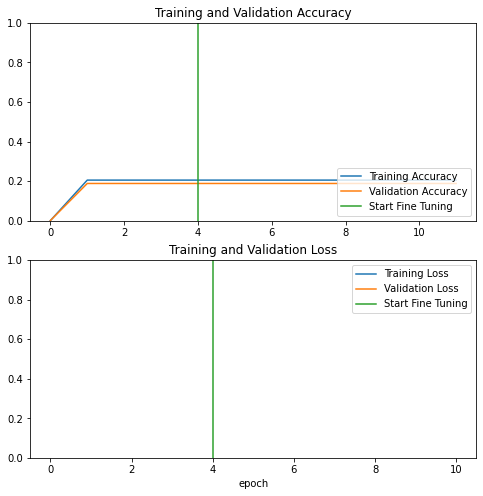

In [31]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()